<a href="https://colab.research.google.com/github/leilaabdel/breast-cancer-multiomic-networks/blob/main/notebooks/examine_network_centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sc
import pickle
import seaborn as sns
import glob
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

In [2]:
import re

## Used to filter genes from metabolites


def isAllPresent(str):
    # ReGex to check if a string 
    # contains uppercase, lowercase 
    # special character & numeric value 
    regex = ("^(?=.*[a-z])")
     
    # Compile the ReGex
    p = re.compile(regex)
 
    # If the string is empty 
    # return false
    if (str == None):
        print("No")
        return
 
    # Print Yes if string 
    # matches ReGex 
    if(re.search(p, str)):
        return False
    else:
        return True
 
# Driver code
 
# Given string 
str = "#YASa"
 
#Function Call
isAllPresent('Taurine')

False

# Breast Cancer Network - HSA05224



In [ ]:
ROOT = '/content/drive/My Drive/Masters-Program/courses/ece-735-networks/breast-cancer-pathways-networks'
BREAST_CANCER_NETWORK_PATH = ROOT + '/data/combined-metabolite-protein-list/metabolite-protein-interact.csv'

## Directed Graph

In [ ]:
G_undir = pickle.load(open(ROOT + '/data/undirected_graph.pickle' , 'rb'))
G_dir = pickle.load(open(ROOT + '/data/directed_graph.pickle' , 'rb'))

In [ ]:
pos = nx.spring_layout(G_dir)

In [ ]:
colors = []
for name in G_undir.nodes():
  if isAllPresent(name) == False:
    colors.append('pink')
  else:
    colors.append('lightgreen')

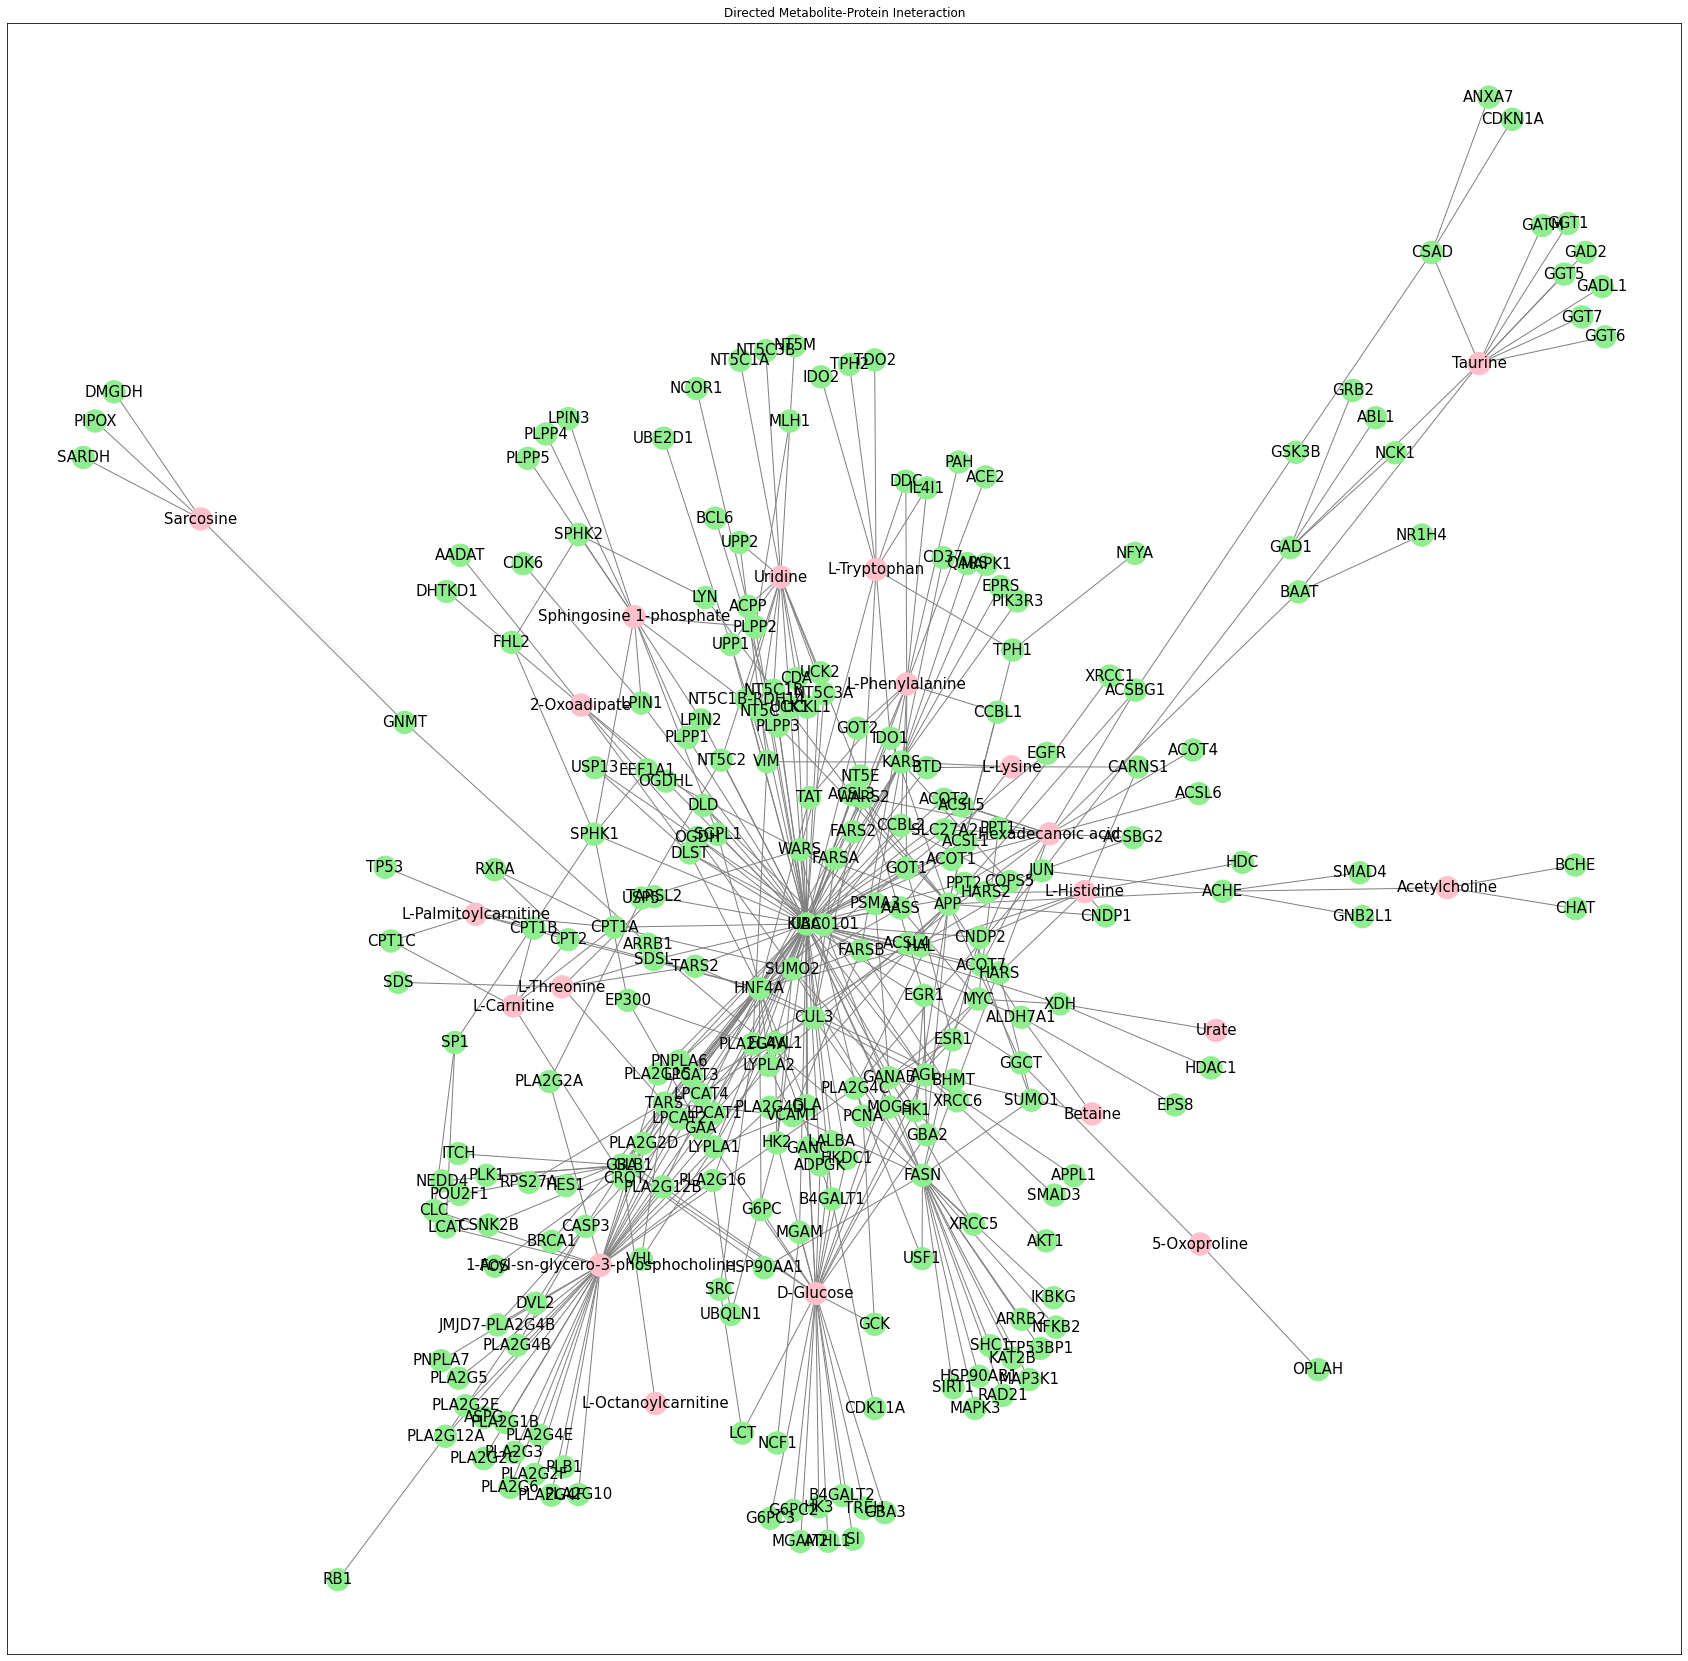

In [ ]:
fig = plt.figure(figsize=(30,30))
nx.draw_networkx(G_undir, node_color=colors , font_size=15, cmap='GnBu', edge_color='gray', node_size=500, arrowsize=30)
KEGG_ID = "HSA05224"
plt.title("Directed Metabolite-Protein Ineteraction")
plt.savefig('directed-graph.eps', dpi=300)

## Get the Graph Adjacency List

In [ ]:
breast_adj = nx.adj_matrix(G_dir)

In [ ]:
len(G_dir.nodes)

276

## Centralities

### Betweenness Centrality

In [ ]:
sns.set(font_scale=4.5)
sns.set_style("white")
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['/content/times new roman.ttf'])
mpl.rc('font', family='Serif')

--2020-11-17 01:14:58--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-11-17 01:14:59--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.4’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2020-11-17 01:14:59 (5.79 MB/s) - ‘thsa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  after removing the cwd from sys.path.


In [ ]:
betweeness = nx.closeness_centrality(G_dir)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


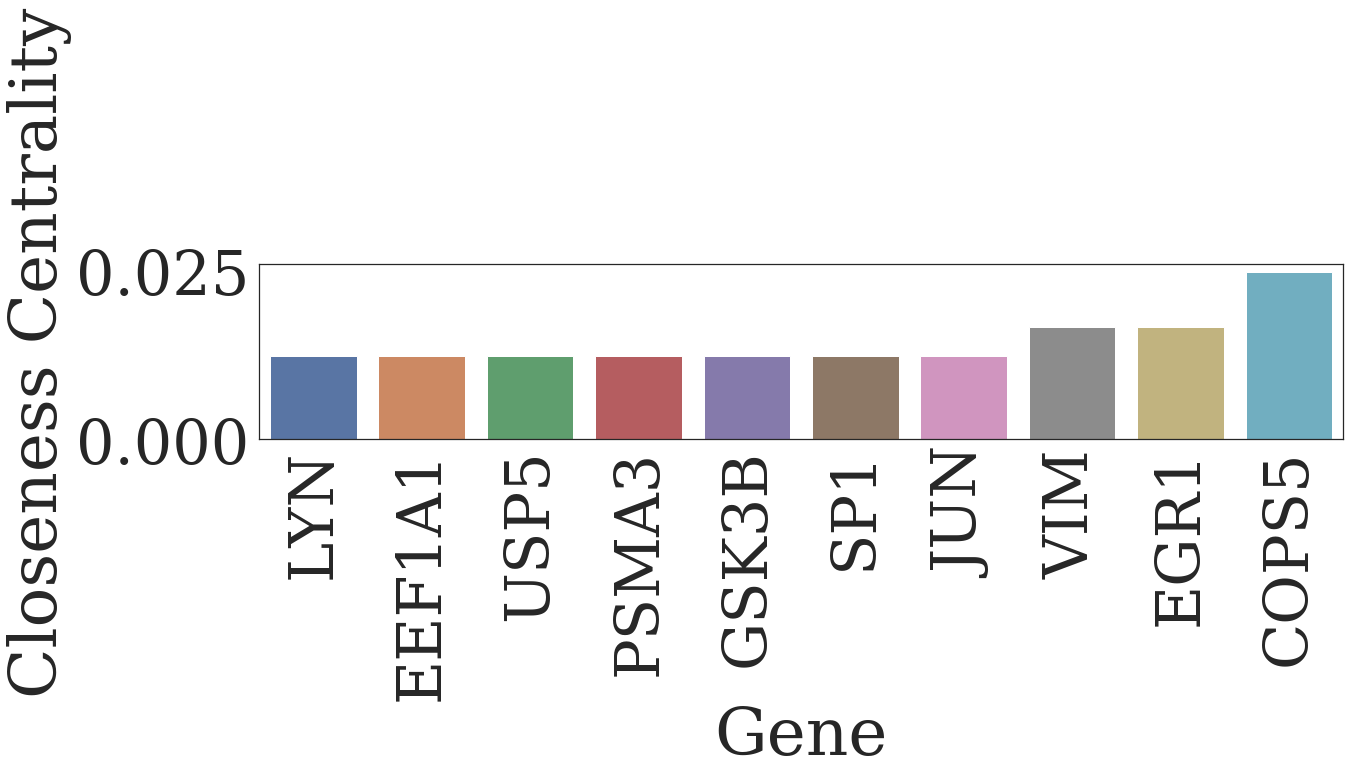

In [ ]:
gene_names = []
gene_betweenness = []
for key, values in betweeness.items():
  if isAllPresent(key):
    gene_names.append(key)
    gene_betweenness.append(values)

a = np.argsort(gene_betweenness , axis=0)
gene_betweenness = np.asarray(gene_betweenness)
gene_names = np.asarray(gene_names)
gene_betweenness = gene_betweenness[a]
gene_names = gene_names[a]
between_df = pd.DataFrame({'Gene':gene_names , 'Closeness Centrality':gene_betweenness})[-10:]
fig = plt.figure(figsize=(20,10))
bar = sns.barplot('Gene' , 'Closeness Centrality' , data=between_df)

for item in bar.get_xticklabels():
    item.set_rotation(90)
plt.tight_layout()
fig.savefig('between-cent.eps', dpi=300)